### PROBLEM STATEMENT

The company wants to anaylze customer behaviour by predicting which customer clicks on the advertisement. Customer data is as follows: 
Inputs: 
- Name 
- e-mail 
- Country 
- Time on Facebook 
- Estimated Salary (derived from other parameters)

Outputs:
- Click (1: customer clicked on Ad, 0: Customer did not click on the Ad)

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Dataset

In [2]:
# read the data using pandas dataframe
training_set = pd.read_csv('Facebook_Ads_2.csv', encoding='ISO-8859-1')

In [3]:
training_set.head()

,Names,emails,Country,Time Spent on Site,Salary,Clicked
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,25.649648,55330.06006,0
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,32.456107,79049.07674,1
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,20.945978,41098.60826,0
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,54.039325,37143.35536,1
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,34.249729,37355.11276,0


In [4]:
training_set.tail()

,Names,emails,Country,Time Spent on Site,Salary,Clicked
494,Rigel,egestas.blandit.Nam@semvitaealiquam.com,Sao Tome and Principe,19.222746,44969.13495,0
495,Walter,ligula@Cumsociis.ca,Nepal,22.665662,41686.20425,0
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,35.320239,23989.80864,0
497,Pearl,penatibus.et@massanonante.com,Philippines,26.539170,31708.57054,0
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,32.386148,74331.35442,1


### EDA

In [5]:
click    = training_set[training_set['Clicked']==1]
no_click = training_set[training_set['Clicked']==0]

In [6]:
print("Total =", len(training_set))
print("Number of customers who clicked on Ad =", len(click))
print("Percentage Clicked =", 1.*len(click)/len(training_set)*100.0, "%")
print("Did not Click =", len(no_click))
print("Percentage who did not Click =", 1.*len(no_click)/len(training_set)*100.0, "%")        

Total = 499
Number of customers who clicked on Ad = 250
Percentage Clicked = 50.1002004008016 %
Did not Click = 249
Percentage who did not Click = 49.899799599198396 %


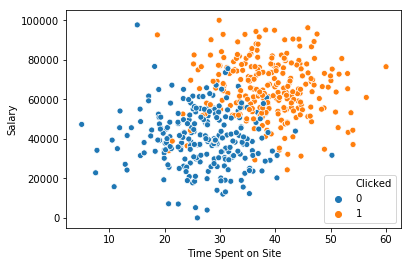

In [7]:
sns.scatterplot(training_set['Time Spent on Site'], training_set['Salary'], hue = training_set['Clicked'])
plt.show()

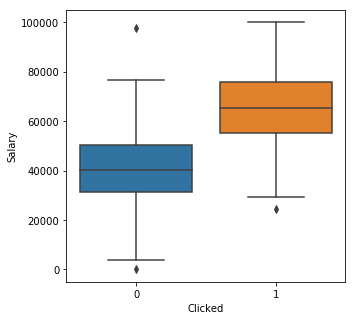

In [8]:
plt.figure(figsize=(5, 5))
sns.boxplot(x='Clicked', y='Salary',data=training_set)
plt.show()

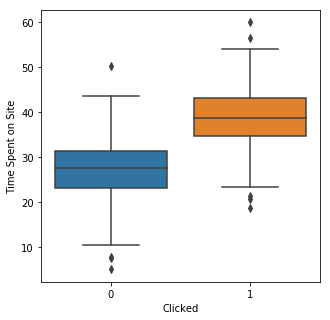

In [9]:
plt.figure(figsize=(5, 5))
sns.boxplot(x='Clicked', y='Time Spent on Site',data=training_set)
plt.show()

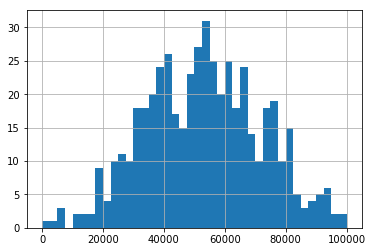

In [10]:
training_set['Salary'].hist(bins = 40)
plt.show()

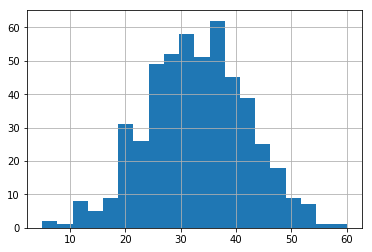

In [11]:
training_set['Time Spent on Site'].hist(bins = 20)
plt.show()

### Data Cleaning

In [12]:
training_set.head()

,Names,emails,Country,Time Spent on Site,Salary,Clicked
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,25.649648,55330.06006,0
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,32.456107,79049.07674,1
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,20.945978,41098.60826,0
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,54.039325,37143.35536,1
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,34.249729,37355.11276,0


In [13]:
training_set.isnull().sum()

Names                 0
emails                0
Country               0
Time Spent on Site    0
Salary                0
Clicked               0
dtype: int64

In [14]:
# Drop emails, country and names
training_set.drop(['Names', 'emails', 'Country'],axis=1,inplace=True)

In [15]:
training_set.head()

,Time Spent on Site,Salary,Clicked
0,25.649648,55330.06006,0
1,32.456107,79049.07674,1
2,20.945978,41098.60826,0
3,54.039325,37143.35536,1
4,34.249729,37355.11276,0


### Logistic Regression Model

In [16]:
# Drop the target column
X = training_set.drop('Clicked',axis=1).values
y = training_set['Clicked'].values

In [17]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 42)
lr.fit(X_train, y_train)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [20]:
y_predict = lr.predict(X_test)
y_predict

array([0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1], dtype=int64)

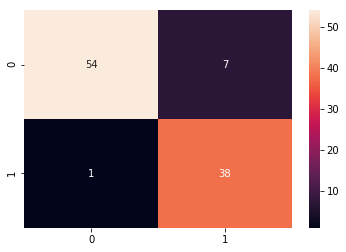

In [21]:
from sklearn.metrics import classification_report,confusion_matrix
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True, fmt="d")
plt.show()

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.98      0.89      0.93        61
           1       0.84      0.97      0.90        39

   micro avg       0.92      0.92      0.92       100
   macro avg       0.91      0.93      0.92       100
weighted avg       0.93      0.92      0.92       100



### Visualizing Training and Testing Datasets

In [23]:
print(X_train.shape,y_train.shape)

(399, 2) (399,)


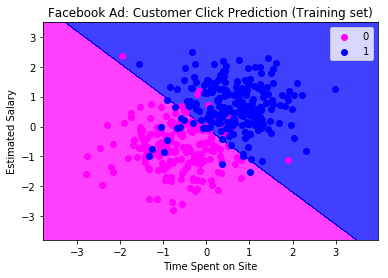

In [24]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, lr.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('magenta', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('magenta', 'blue'))(i), label = j)
plt.title('Facebook Ad: Customer Click Prediction (Training set)')
plt.xlabel('Time Spent on Site')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

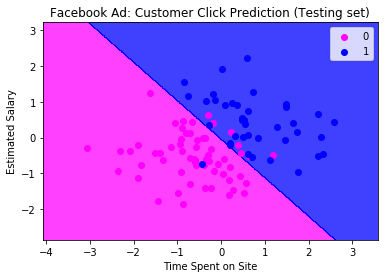

In [25]:
# Visualising the Testing set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, lr.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('magenta', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('magenta', 'blue'))(i), label = j)
plt.title('Facebook Ad: Customer Click Prediction (Testing set)')
plt.xlabel('Time Spent on Site')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()